In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import glob
import tqdm
import csv
import cv2
import random
import os
from sklearn.model_selection import train_test_split

In [2]:
folder = "/Users/peammaep/Desktop/PeamMiiZ.A/Area/mahidol/junior/egco486-image/src/Drone_dataset"
testFolder = folder + "/test"
trainFolder = folder + "/train"
answerFile = folder + "/answer.csv"

In [165]:
## Data Preprocessing Part
## random the image from the building part
trainImg = glob.glob(trainFolder + "/**/*.jpg" , recursive = True)

def showRandomImageWithNaming(datasetClass):
    myImage = [file for file in tqdm.tqdm(trainImg) if file.split("/")[-2] == datasetClass]

    if myImage:
        randomImage = random.choice(myImage)
        image = cv2.imread(randomImage)
        imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(imageRGB)
        plt.title(datasetClass + " Image")
        return imageRGB
    else :
        print("Image Not found !")

In [4]:
def showHistogram(myImage):
  color = ('r' , 'g' , 'b')
  for i , color in enumerate(color):
    # computing the histogram of the blue channel of the image
    hist = cv2.calcHist([myImage],[i],None,[256],[0,256])
    plt.plot(hist , color = color)
    plt.xlim([0,256])

    plt.title("Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

100%|██████████| 720/720 [00:00<00:00, 1403298.74it/s]


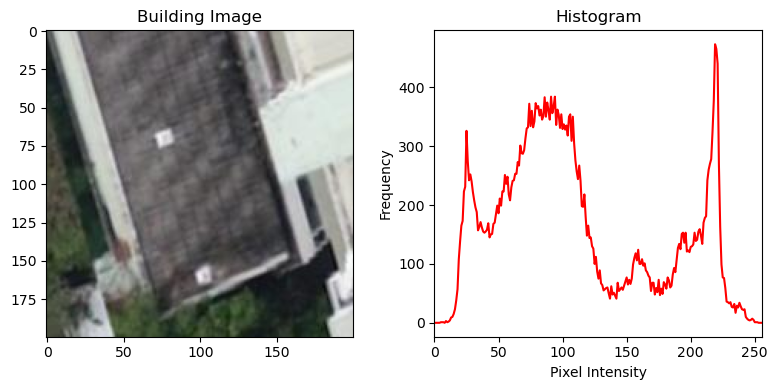

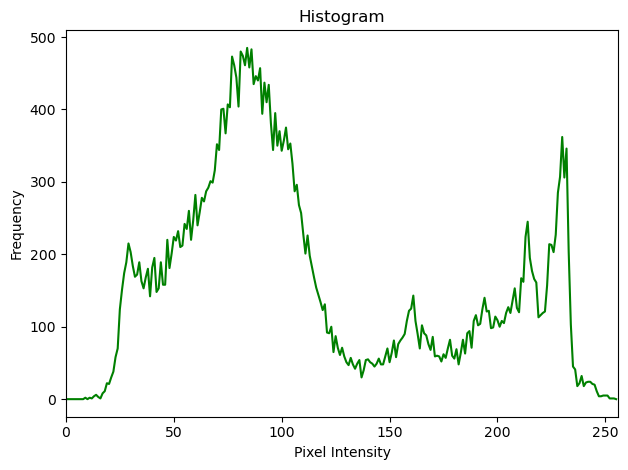

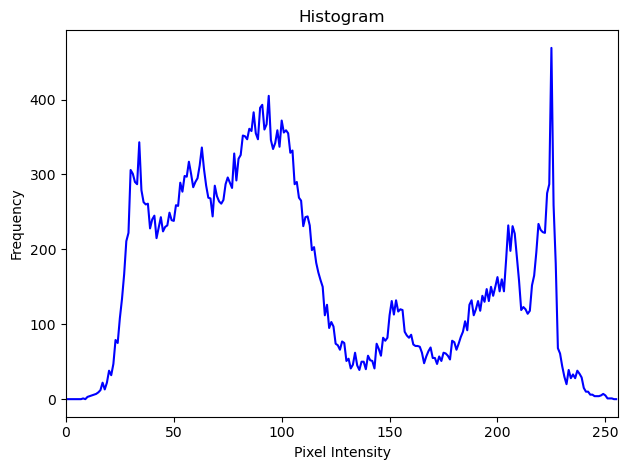

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(1 , 2 , 1)
img = showRandomImageWithNaming("Building")
plt.subplot(1 , 2 , 2)
showHistogram(img)

100%|██████████| 720/720 [00:00<00:00, 654649.66it/s]


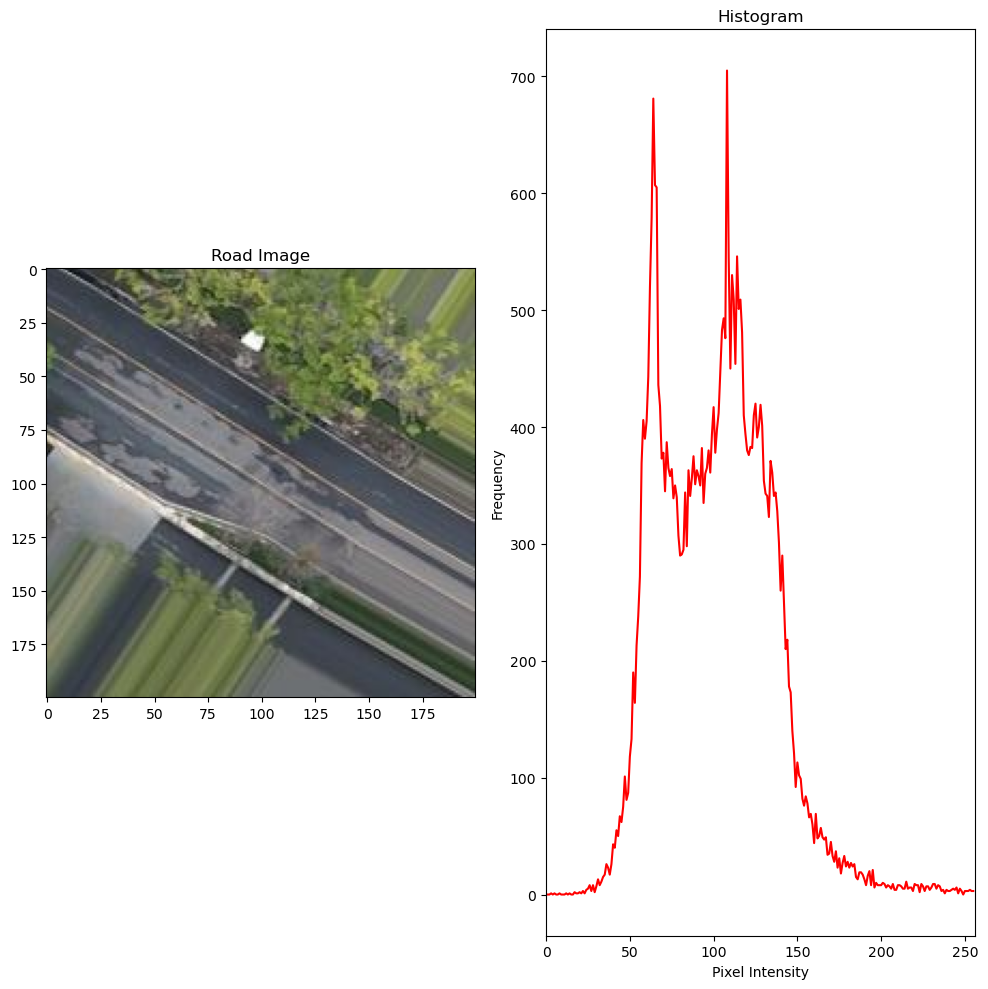

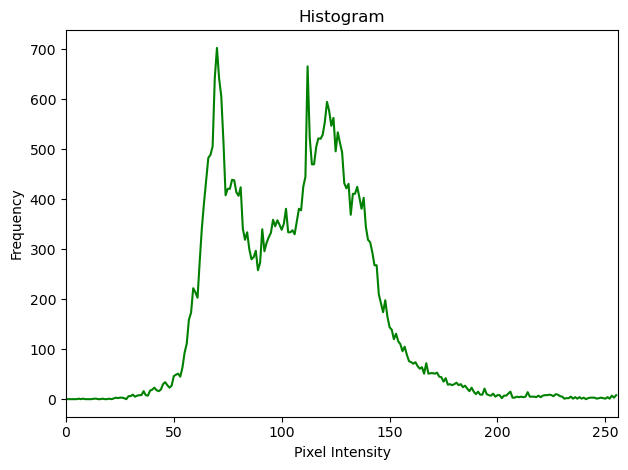

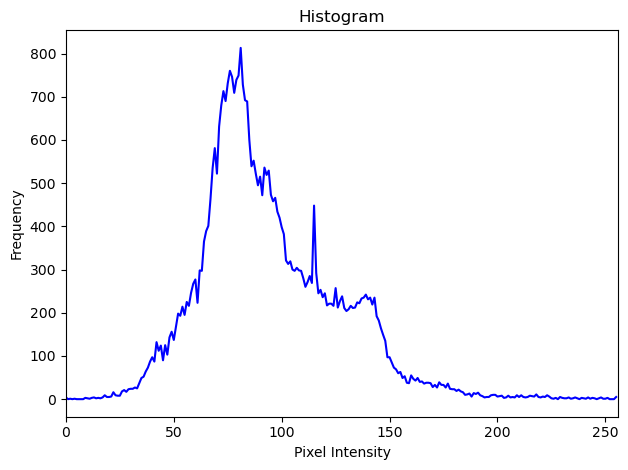

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1 , 2 , 1)
img = showRandomImageWithNaming("Road")
plt.subplot(1 , 2 , 2)
showHistogram(img)

100%|██████████| 720/720 [00:00<00:00, 1252550.34it/s]


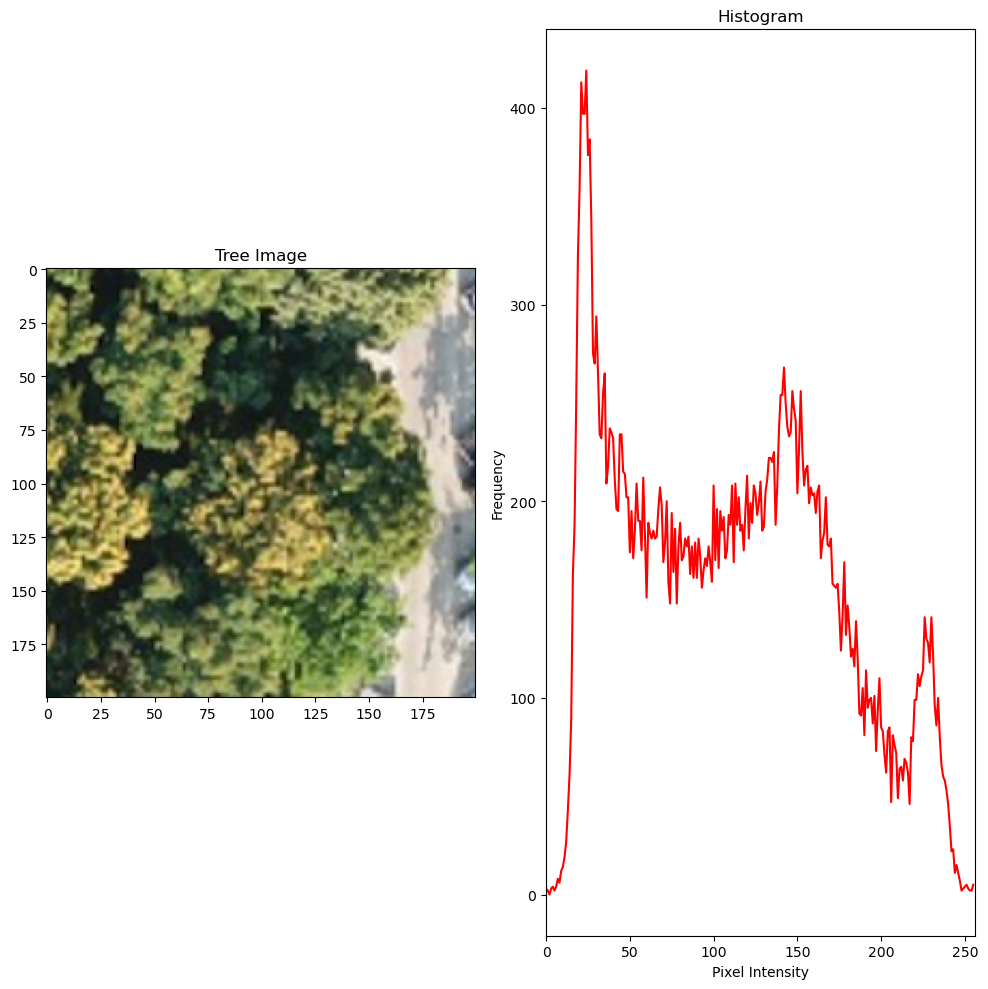

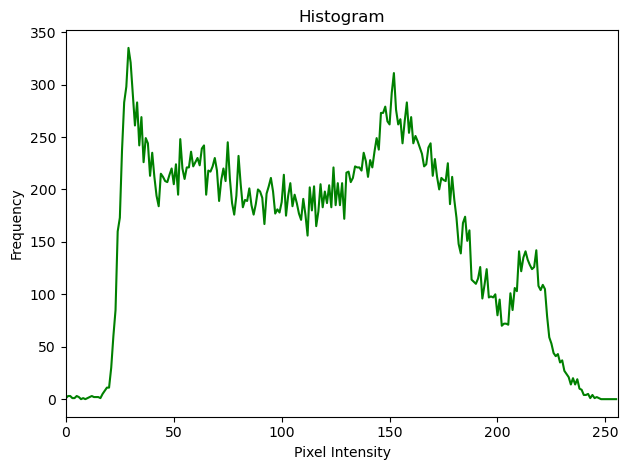

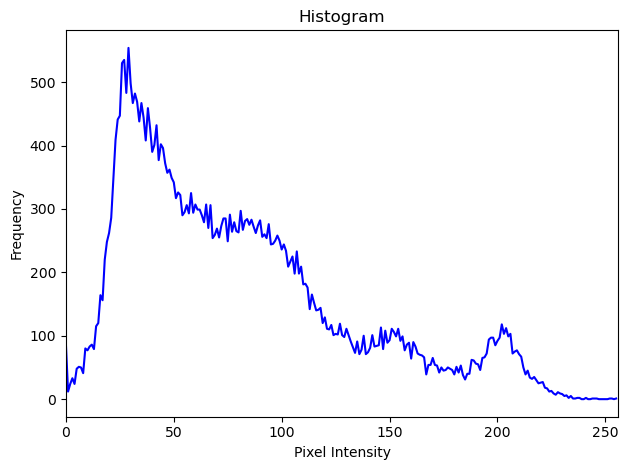

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(1 , 2 , 1)
img = showRandomImageWithNaming("Tree")
plt.subplot(1 , 2 , 2)
showHistogram(img)

In [240]:
# make the training image of all file in folder ( building , road and tree )
with open('droneDataset.csv', mode='w') as droneFile:
    features = ['mean', 'med', 'std' , 'mean_gray' , 'med_gray' , 'std_gray', 'mean_hsv' , 'med_hsv' , 'std_hsv', 'histRed_mean',  'histRed_med' , 'histRed_std',
                'histGreen_mean',  'histGreen_med' , 'histGreen_std',
                'histBlue_mean',  'histBlue_med' , 'histBlue_std', 'histGray_mean' , 'histGray_med' , 'histGray_std' , 'histHue_mean' , 'histHue_med' , 'histHue_std' , 'histSat_mean' ,  'histSat_med' , 'histSat_std'  , 'histValue_mean' , 'histValue_med' , 'histValue_std' ,'class']  # Feature headers
    writer = csv.DictWriter(droneFile, fieldnames=features)
    writer.writeheader()

    for file in tqdm.tqdm(trainImg):
        img = cv2.imread(file)  # Read the image
        imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imageGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imageHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Calculate histograms
        histRed = cv2.calcHist([imageRGB], [0], None, [256], [0, 256])
        histGreen = cv2.calcHist([imageRGB], [1], None, [256], [0, 256])
        histBlue = cv2.calcHist([imageRGB], [2], None, [256], [0, 256])
        histGray = cv2.calcHist([imageGray], [0], None, [256], [0, 256])
        histHue = cv2.calcHist([imageHSV], [0], None, [256], [0, 256])
        histSat = cv2.calcHist([imageHSV], [1], None, [256], [0, 256])
        histValue = cv2.calcHist([imageHSV], [2], None, [256], [0, 256])

        # Extract statistical features from the histograms
        histRed_mean = np.mean(histRed)
        histRed_med = np.median(histRed)
        histRed_std = np.std(histRed)

        histGreen_mean = np.mean(histGreen)
        histGreen_med = np.median(histGreen)
        histGreen_std = np.std(histGreen)

        histBlue_mean = np.mean(histBlue)
        histBlue_med = np.median(histBlue)
        histBlue_std = np.std(histBlue)

        histGray_mean = np.mean(histGray)
        histGray_med = np.median(histGray)
        histGray_std = np.std(histGray)

        histHue_mean = np.mean(histHue)
        histHue_med = np.median(histHue)
        histHue_std = np.std(histHue)

        histSat_mean = np.mean(histSat)
        histSat_med = np.median(histSat)
        histSat_std = np.std(histSat)

        histValue_mean = np.mean(histValue)
        histValue_med = np.median(histValue)
        histValue_std = np.std(histValue)

        # Write data to CSV
        writer.writerow({
            'mean': np.mean(imageRGB),
            'med': np.median(imageRGB),
            'std': np.std(imageRGB),
            'mean_gray': np.mean(imageGray),
            'med_gray': np.median(imageGray),
            'std_gray': np.std(imageGray),
            'mean_hsv': np.mean(imageHSV),
            'med_hsv': np.median(imageHSV),
            'std_hsv': np.std(imageHSV),
            'histRed_mean': histRed_mean,
            'histRed_med': histRed_med,
            'histRed_std': histRed_std,
            'histGreen_mean': histGreen_mean,
            'histGreen_med': histGreen_med,
            'histGreen_std': histGreen_std,
            'histBlue_mean': histBlue_mean,
            'histBlue_med': histBlue_med,
            'histBlue_std': histBlue_std,
            'histGray_mean': histGray_mean,
            'histGray_med': histGray_med,
            'histGray_std': histGray_std,
            'histHue_mean': histHue_mean,
            'histHue_med': histHue_med,
            'histHue_std': histHue_std,
            'histSat_mean': histSat_mean,
            'histSat_med': histSat_med,
            'histSat_std': histSat_std,
            'histValue_mean': histValue_mean,
            'histValue_med': histValue_med,
            'histValue_std': histValue_std,
            'class': file.split('/')[-2]  # Class label based on folder name
        })


100%|██████████| 720/720 [00:01<00:00, 361.17it/s]


In [241]:
droneFile = pd.read_csv('droneDataset.csv')
droneFile

,mean,med,std,mean_gray,med_gray,std_gray,mean_hsv,med_hsv,std_hsv,histRed_mean,...,histHue_mean,histHue_med,histHue_std,histSat_mean,histSat_med,histSat_std,histValue_mean,histValue_med,histValue_std,class
0,78.506317,68.0,48.334778,85.029900,77.0,47.166288,79.301400,72.0,44.230947,156.250,...,156.250,3.0,363.98428,156.250,141.0,133.57521,156.250,146.0,126.57884,Tree
1,74.209342,67.0,40.455003,79.034775,71.0,40.010538,74.675175,71.0,37.380037,156.250,...,156.250,1.0,282.92953,156.250,79.0,179.19064,156.250,119.5,150.60303,Tree
2,98.103883,97.0,43.111703,103.021350,106.0,41.478710,78.241217,75.0,45.338976,156.250,...,156.250,9.0,281.37646,156.250,120.5,146.83138,156.250,148.0,134.82993,Tree
3,86.038683,75.0,49.074893,96.621850,93.0,47.930166,93.861917,91.0,49.101624,156.250,...,156.250,0.0,377.16772,156.250,97.0,153.97914,156.250,193.0,113.21678,Tree
4,83.095600,70.0,50.990655,87.954675,77.0,49.671039,79.125442,72.0,42.105800,156.250,...,156.250,1.0,264.31400,156.250,76.5,164.19829,156.250,142.5,131.17989,Tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,220.060075,233.0,24.881760,220.742900,234.0,24.645509,87.335575,13.0,100.031828,156.250,...,156.250,0.0,1063.99210,156.250,0.0,1029.87070,156.250,7.0,480.45615,Building
716,173.416942,202.0,58.910240,174.146975,205.0,59.009499,79.744125,23.0,84.196580,156.250,...,156.250,0.0,882.80945,156.250,0.0,825.05020,156.250,69.0,374.20767,Building
717,146.595592,178.0,58.172878,148.910775,182.0,56.615054,83.940917,67.0,64.955987,156.250,...,156.250,0.0,451.04184,156.250,0.0,411.07770,156.250,78.0,252.96033,Building
718,122.543617,109.0,55.964994,125.192300,116.0,55.572264,71.851033,58.0,56.146936,78.125,...,78.125,0.0,232.56287,78.125,0.0,162.26251,78.125,55.5,78.75551,Building


## 3) Train The Model


### Decision Tree

In [242]:
## train the model -> select the ml algorithm ( try to use the decision tree )
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [291]:
featured_cols = ['mean', 'med', 'std' , 'mean_gray' , 'med_gray' , 'std_gray', 'mean_hsv' , 'med_hsv' , 'std_hsv' , 'histRed_mean',  'histRed_med' , 'histRed_std',
                'histGreen_mean',  'histGreen_med' , 'histGreen_std',
                'histBlue_mean',  'histBlue_med' , 'histBlue_std', 'histGray_mean' , 'histGray_med' , 'histGray_std' , 'histHue_mean' , 'histHue_med' , 'histHue_std' , 'histSat_mean' ,  'histSat_med' , 'histSat_std'  , 'histValue_mean' , 'histValue_med' , 'histValue_std']

X = droneFile[featured_cols]
y = droneFile['class']

cv_decisionTree = KFold(n_splits=20, random_state=2 , shuffle=True)

decisionTreeModel = DecisionTreeClassifier(random_state=42)
decisionTreeModel.fit(X = X , y = y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_ * 100))

# Use the best model for predictions
best_model = grid_search.best_estimator_

# evaluate the model by cross validation score
scores = cross_val_score(decisionTreeModel, X = X, y = y, cv = cv_decisionTree, scoring = 'accuracy' , n_jobs = -1)
print('(Decision Tree) Accuracy: %.3f +-(%.3f)' % (np.mean(scores*100), np.std(scores*100)))

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 92.778
(Decision Tree) Accuracy: 91.389 +-(4.883)


### K-nearest Neighbor ( KNN )

In [367]:
from sklearn.neighbors import KNeighborsClassifier

cv_knn = KFold(n_splits=20, random_state=2, shuffle=True)

neighborModel = KNeighborsClassifier(n_neighbors=3)
neighborModel.fit(X = X , y = y)

# Perform cross-validation
cv_scores = cross_val_score(neighborModel, X, y, cv=cv_knn, scoring='accuracy' , n_jobs = -1)  # 5-fold CV
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f} (+/- {cv_scores.std() * 100:.2f})")

Cross-Validation Accuracy: 95.83 (+/- 2.85)


### Support Vector Machine

In [446]:
from sklearn.svm import SVC

# Cross-validation setup
cv_svm = KFold(n_splits=10, random_state=42, shuffle=True)

# SVM Model
svm_model = SVC(C=100 , random_state=42, kernel='rbf')  # Using RBF kernel as a starting point

svm_model.fit(X, y)

# Optional: Evaluate the best model with cross-validation
scores = cross_val_score(best_svm_model, X, y, cv=cv_svm, scoring='accuracy', n_jobs=-1)
print("(SVM) Accuracy with Best Parameters: {:.3f} ± {:.3f}".format(np.mean(scores) * 100, np.std(scores) * 100))

(SVM) Accuracy with Best Parameters: 35.694 ± 5.557


### Extra Tree Classifier

In [466]:
from sklearn.ensemble import ExtraTreesClassifier

X = droneFile[featured_cols]
y = droneFile['class']

# Cross-validation setup
cv_extraTrees = KFold(n_splits=10 , random_state=42, shuffle=True)

# Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier(random_state=42 , n_estimators=100 , n_jobs=-1 , min_samples_split=2 , min_samples_leaf= 1)

# Fit GridSearchCV
grid_search_extra.fit(X, y)

# Best parameters and cross-validation score
print("Best parameters:", grid_search_extra.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search_extra.best_score_))

# Use the best model for predictions
best_extra_trees_model = grid_search_extra.best_estimator_

# Optional: Evaluate the best model with cross-validation
scores = cross_val_score(best_extra_trees_model, X, y, cv=cv_extraTrees, scoring='accuracy', n_jobs=-1)
print("(Extra Trees) Accuracy with Best Parameters: {:.3f} ± {:.3f}".format(np.mean(scores) * 100, np.std(scores) * 100))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.981
(Extra Trees) Accuracy with Best Parameters: 97.778 ± 1.934


In [246]:
from sklearn.model_selection import learning_curve

def displayLearningCurve(model , X , y , cv , model_name):
    fig , ax = plt.subplots(1,2 , figsize=(10,8))
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)  # Vary the training set size
    )

    # Calculate mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    ax[0].plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
    ax[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax[0].plot(train_sizes, test_mean, label='Validation Score', color='green', marker='o')
    ax[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

    ax[0].set_title('Learning Curve' + model_name)
    ax[0].set_xlabel('Training Set Size')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    ax[0].grid()

    # Compute training and validation error as 1 - accuracy
    train_error = 1 - train_mean
    test_error = 1 - test_mean

    # Plot the loss curve
    ax[1].plot(train_sizes, train_error, label='Training Error', color='red', marker='o')
    ax[1].plot(train_sizes, test_error, label='Validation Error', color='orange', marker='o')

    ax[1].set_title('Loss Curve' + model_name)
    ax[1].set_xlabel('Training Set Size')
    ax[1].set_ylabel('Error (1 - Accuracy)')
    ax[1].legend(loc='best')
    ax[1].grid()

    plt.show()

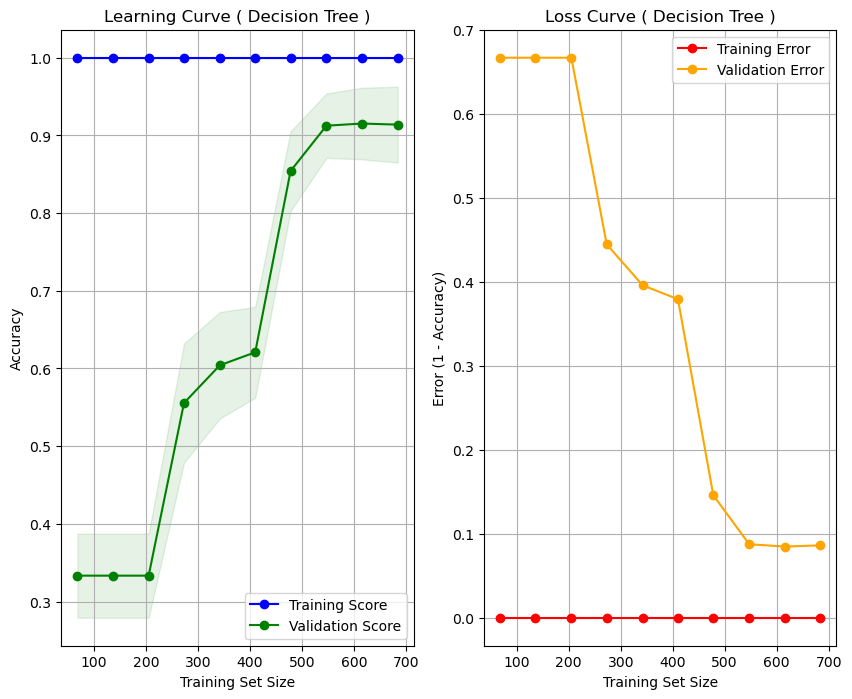

In [247]:
displayLearningCurve(decisionTreeModel, X, y, cv_decisionTree , " ( Decision Tree )")

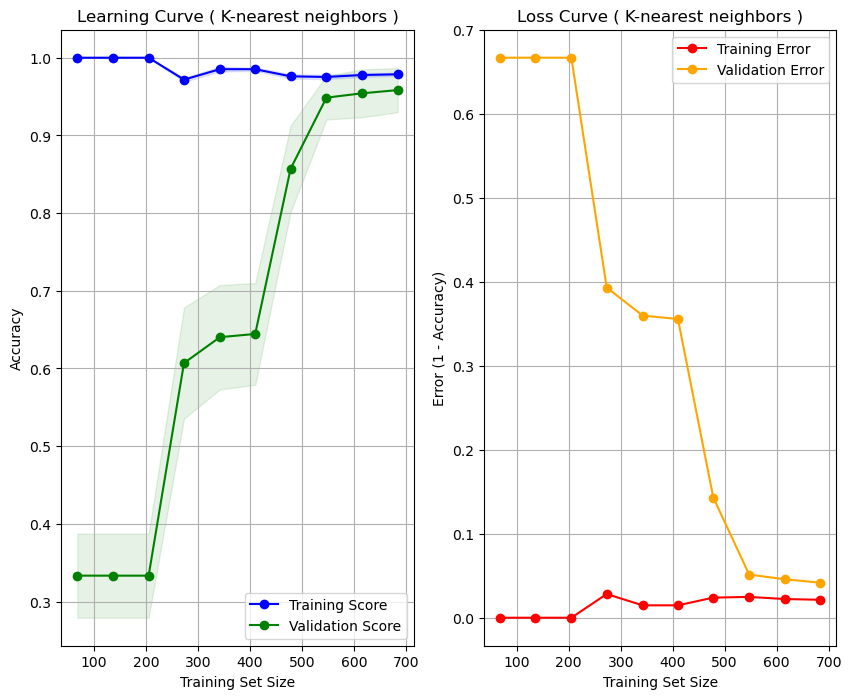

In [248]:
displayLearningCurve(neighborModel, X, y, cv_knn , " ( K-nearest neighbors )")

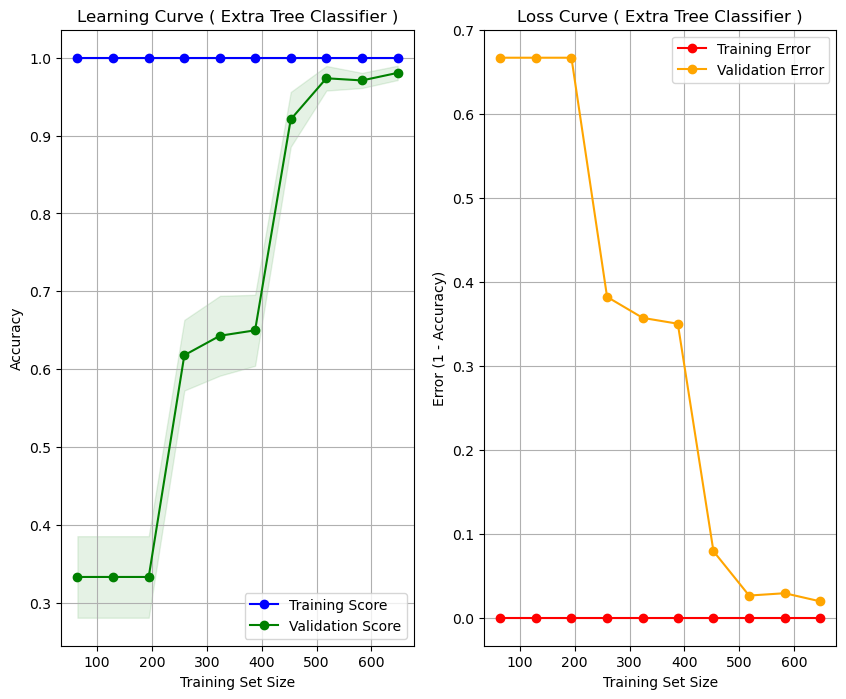

In [463]:
displayLearningCurve(best_extra_trees_model, X, y, cv_extraTrees , " ( Extra Tree Classifier )")

## 4) Test the Model

In [286]:
test_folder = glob.glob(testFolder + "/*.jpg" , recursive = True)

def writeTestScoreModel(fileName , model):
    with open(fileName, 'w', newline='') as out_csv:
        writer = csv.writer(out_csv)
        writer.writerow(["Id", "Category"])

        for file in tqdm.tqdm(test_folder):
            # Read image in test folder
            img = cv2.imread(file)  # Read the image
            imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imageGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            imageHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Calculate histograms
            histRed = cv2.calcHist([imageRGB], [0], None, [256], [0, 256])
            histGreen = cv2.calcHist([imageRGB], [1], None, [256], [0, 256])
            histBlue = cv2.calcHist([imageRGB], [2], None, [256], [0, 256])
            histGray = cv2.calcHist([imageGray], [0], None, [256], [0, 256])
            histHue = cv2.calcHist([imageHSV], [0], None, [256], [0, 256])
            histSat = cv2.calcHist([imageHSV], [1], None, [256], [0, 256])
            histValue = cv2.calcHist([imageHSV], [2], None, [256], [0, 256])

            # Extract statistical features from the histograms
            histRed_mean = np.mean(histRed)
            histRed_med = np.median(histRed)
            histRed_std = np.std(histRed)

            histGreen_mean = np.mean(histGreen)
            histGreen_med = np.median(histGreen)
            histGreen_std = np.std(histGreen)

            histBlue_mean = np.mean(histBlue)
            histBlue_med = np.median(histBlue)
            histBlue_std = np.std(histBlue)

            histGray_mean = np.mean(histGray)
            histGray_med = np.median(histGray)
            histGray_std = np.std(histGray)

            histHue_mean = np.mean(histHue)
            histHue_med = np.median(histHue)
            histHue_std = np.std(histHue)

            histSat_mean = np.mean(histSat)
            histSat_med = np.median(histSat)
            histSat_std = np.std(histSat)

            histValue_mean = np.mean(histValue)
            histValue_med = np.median(histValue)
            histValue_std = np.std(histValue)

            df_test = pd.DataFrame(columns=featured_cols)
            row_data = [np.mean(imageRGB), np.median(imageRGB), np.std(imageRGB),
                        np.mean(imageGray), np.median(imageGray), np.std(imageGray),
                        np.mean(imageHSV), np.median(imageHSV), np.std(imageHSV),
                            histRed_mean, histRed_med , histRed_std,
                            histGreen_mean, histGreen_med , histGreen_std,
                            histBlue_mean,  histBlue_med ,histBlue_std ,
                            histGray_mean,  histGray_med ,histGray_std ,
                            histHue_mean,  histHue_med ,histHue_std ,
                            histSat_mean,  histSat_med ,histSat_std ,
                            histValue_mean,  histValue_med ,histValue_std ,
                        ]
            df_test.loc[0] = row_data

            # Model predict
            predict_classes = model.predict(df_test)

            writer.writerow([os.path.basename(file), predict_classes[0]])

In [250]:
def sortedScoreModel(fileName):
    data = pd.read_csv(fileName)
    # Extract numeric values and handle potential NaN values
    data['Id'] = data['Id'].str.extract(r'(\d+)', expand=False)
    data['Id'] = pd.to_numeric(data['Id'], errors='coerce')

    # Sort the data, dropping NaN values if they exist
    sorted_data = data.sort_values(by=['Id'], ascending=True)

    sorted_data['Id'] = sorted_data['Id'].astype(str) + ".jpg"

    # Save the sorted data to a new CSV file
    sorted_data.to_csv(fileName, index=False)

### Decision Tree Test

In [292]:
writeTestScoreModel('./TestScoreDecisionTree.csv' , decisionTreeModel)
sortedScoreModel('./TestScoreDecisionTree.csv')

100%|██████████| 180/180 [00:00<00:00, 274.70it/s]


In [293]:
TestScoreDecisionTree = pd.read_csv('./TestScoreDecisionTree.csv')
TestScoreDecisionTree

,Id,Category
0,1.jpg,Road
1,2.jpg,Road
2,3.jpg,Tree
3,4.jpg,Road
4,5.jpg,Tree
...,...,...
175,176.jpg,Road
176,177.jpg,Tree
177,178.jpg,Building
178,179.jpg,Building


### KNN Test

In [368]:
writeTestScoreModel('./TestScoreKNN.csv' , neighborModel)
sortedScoreModel('./TestScoreKNN.csv')

100%|██████████| 180/180 [00:00<00:00, 209.89it/s]


In [369]:
TestScoreKNN = pd.read_csv('./TestScoreKNN.csv')
TestScoreKNN

,Id,Category
0,1.jpg,Road
1,2.jpg,Tree
2,3.jpg,Road
3,4.jpg,Road
4,5.jpg,Tree
...,...,...
175,176.jpg,Road
176,177.jpg,Tree
177,178.jpg,Building
178,179.jpg,Building


### Support Vector Machine Test

In [447]:
writeTestScoreModel('./TestScoreSVM.csv' , svm_model)
sortedScoreModel('./TestScoreSVM.csv')

100%|██████████| 180/180 [00:00<00:00, 270.94it/s]


In [448]:
TestScoreSVM = pd.read_csv('./TestScoreSVM.csv')
TestScoreSVM

,Id,Category
0,1.jpg,Road
1,2.jpg,Tree
2,3.jpg,Road
3,4.jpg,Road
4,5.jpg,Tree
...,...,...
175,176.jpg,Road
176,177.jpg,Tree
177,178.jpg,Building
178,179.jpg,Building


### Extra Tree Classifier Test

In [467]:
writeTestScoreModel('./TestScoreExtraTree.csv' , best_extra_trees_model)
sortedScoreModel('./TestScoreExtraTree.csv')

100%|██████████| 180/180 [00:00<00:00, 184.49it/s]


In [468]:
TestScoreExtraTree = pd.read_csv('./TestScoreExtraTree.csv')
TestScoreExtraTree

,Id,Category
0,1.jpg,Road
1,2.jpg,Tree
2,3.jpg,Road
3,4.jpg,Road
4,5.jpg,Tree
...,...,...
175,176.jpg,Tree
176,177.jpg,Tree
177,178.jpg,Building
178,179.jpg,Building


## 5) Evaluate the Model

In [470]:
# evaluation between answer.csv and testScore.csv
realScore = pd.read_csv(answerFile)
realScore

,Id,Category
0,1.jpg,Road
1,2.jpg,Tree
2,3.jpg,Road
3,4.jpg,Road
4,5.jpg,Tree
...,...,...
175,176.jpg,Road
176,177.jpg,Tree
177,178.jpg,Building
178,179.jpg,Building


In [280]:
def evaluate_model_accuracy_score(testScoreCSV , modelName):
    categoryMatch = testScoreCSV['Category'] == realScore['Category']

    true_percentage = (categoryMatch.sum()/len(categoryMatch)) * 100
    false_percentage = 100 - true_percentage

    print(f"{modelName} -> Percentage of True Matches: {true_percentage:.2f}%")
    print(f"{modelName} -> Percentage of False Matches: {false_percentage:.2f}%")

### Decision Tree

In [371]:
evaluate_model_accuracy_score(TestScoreDecisionTree , "Decision Tree")

Decision Tree -> Percentage of True Matches: 87.78%
Decision Tree -> Percentage of False Matches: 12.22%


### KNN


In [450]:
evaluate_model_accuracy_score(TestScoreKNN, "K-nearest neighbors")

K-nearest neighbors -> Percentage of True Matches: 95.00%
K-nearest neighbors -> Percentage of False Matches: 5.00%


### Support Vector Machine

In [449]:
evaluate_model_accuracy_score(TestScoreSVM, "Support Vector Machine")

Support Vector Machine -> Percentage of True Matches: 95.56%
Support Vector Machine -> Percentage of False Matches: 4.44%


### Extra Tree Classifier

In [469]:
evaluate_model_accuracy_score(TestScoreExtraTree, "Extra Tree Classifier")

Extra Tree Classifier -> Percentage of True Matches: 97.22%
Extra Tree Classifier -> Percentage of False Matches: 2.78%
